<a href="https://colab.research.google.com/github/jiayuankeliang/309CourseWork2/blob/main/Test_File_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [19]:
!pip install kaggle

import json
token = {"username":"readyplayer2023","key":"e69b9e01826ff66293f99a34bbd1c156"}
with open('/content/kaggle.json', 'w') as file:
  json.dump(token, file)


!mkdir -p /root/.kaggle
!cp /content/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle config set -n path -v /content

!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

!unzip /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/gtsrb-german-traffic-sign.zip



Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
train_dir = '/content/train'

In [22]:
train_labels = pd.read_csv('/content/Train.csv')
test_labels= pd.read_csv('/content/Test.csv')

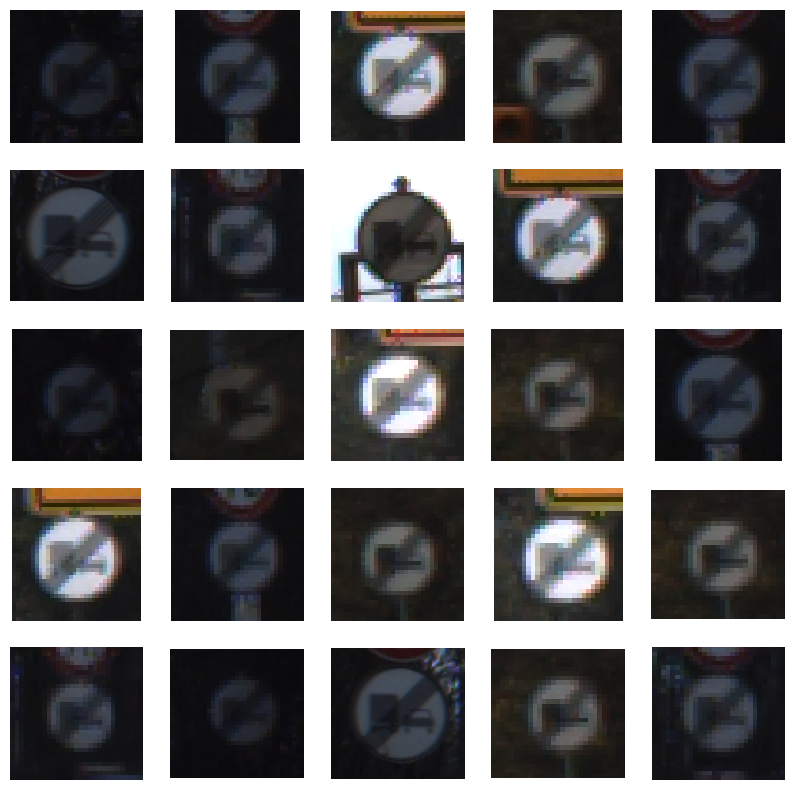

In [9]:
#load first 25 images
plt.figure(figsize=(10,10))
i = 0

for root, dirs, files in os.walk(train_dir):
    for file in files:
        # Check if file has valid extension
        if file.endswith('.jpg') or file.endswith('.png'):
            img_path = os.path.join(root, file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(5,5,i+1)
            plt.imshow(img)
            plt.axis('off')
            i += 1
            if i == 25:
                break
    if i == 25:
        break
plt.show()


In [10]:
#print the number of images in each class
print(train_labels['ClassId'].value_counts())


2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
3     1410
8     1410
11    1320
18    1200
35    1200
17    1110
14     780
31     780
33     689
15     630
26     600
28     540
23     510
30     450
16     420
6      420
34     420
22     390
36     390
40     360
20     360
21     330
39     300
29     270
24     270
32     240
27     240
41     240
42     240
37     210
0      210
19     210
Name: ClassId, dtype: int64


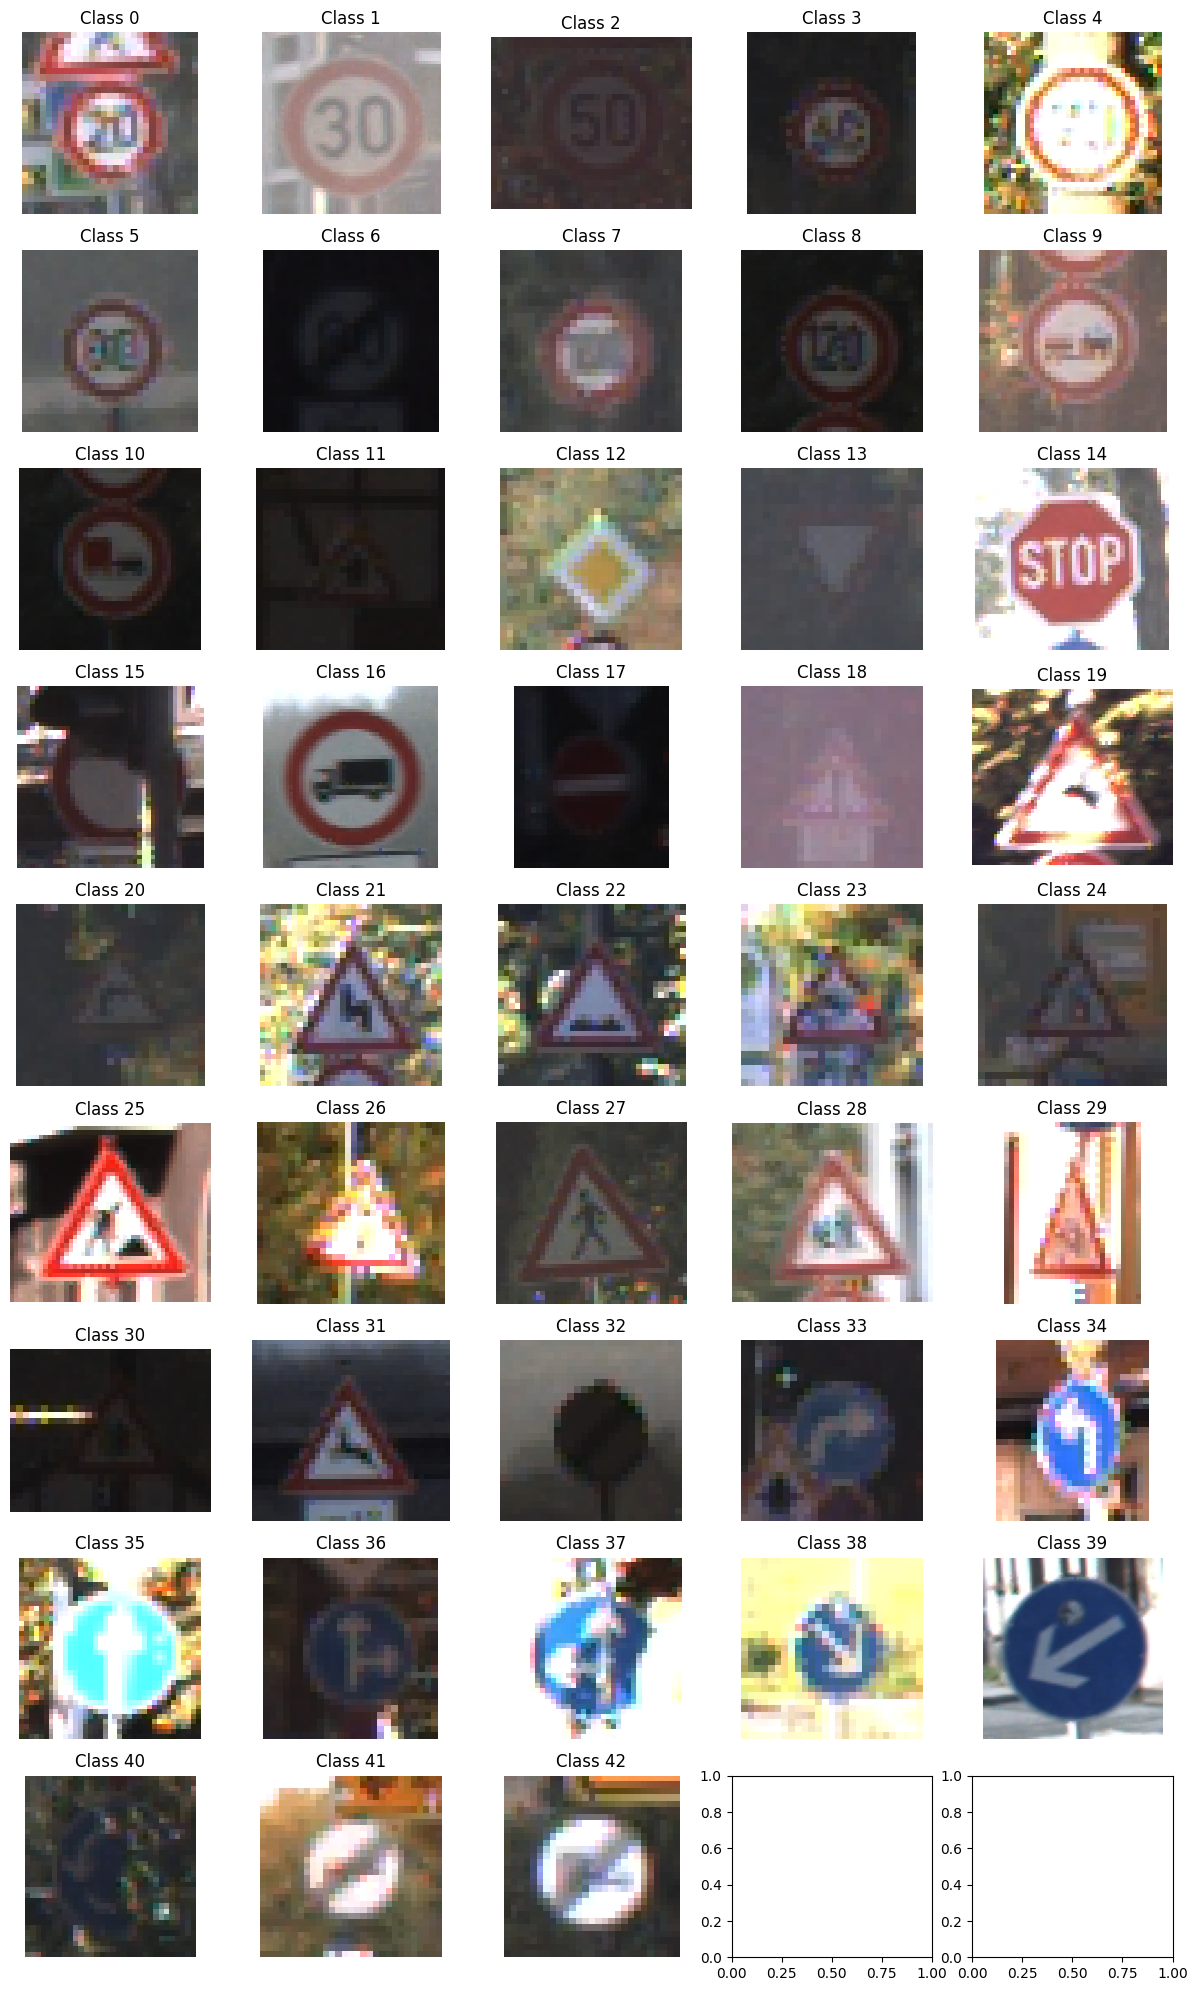

In [11]:
#show a sample image from each class
fig, axs = plt.subplots(nrows=9, ncols=5, figsize=(15, 25))
axs = axs.flatten()
for i in range(43):
    class_id = train_labels[train_labels['ClassId']==i].iloc[0]['Path'].split('/')[-2]
    img_path = os.path.join(train_dir, class_id, train_labels[train_labels['ClassId']==i].iloc[0]['Path'].split('/')[-1])
    img = cv2.imread(img_path)
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f'Class {i}')
    axs[i].axis('off')
    
plt.show()

In [23]:
# computes the mean and standard deviation of the pixel values of images in train
img_mean = []
img_std = []

for filename in train_labels['Path']:
    img_path = os.path.join(train_dir, filename)
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img_mean.append(img.mean(axis=(0,1)))
        img_std.append(img.std(axis=(0,1)))
    else:
        print(f"File not found: {img_path}")

img_mean = np.array(img_mean)
img_std = np.array(img_std)

print('Mean pixel values:', img_mean.mean(axis=0))
print('Standard deviation of pixel values:', img_std.mean(axis=0))
#the red channel has pixel value of 81.96,green channel has a pixel value of 79.59. blue channel has a pixel value of 86.76 for normalization

Mean pixel values: [81.96093437 79.59306377 86.75876509]
Standard deviation of pixel values: [45.51477658 42.91490727 42.84689382]


<Axes: >

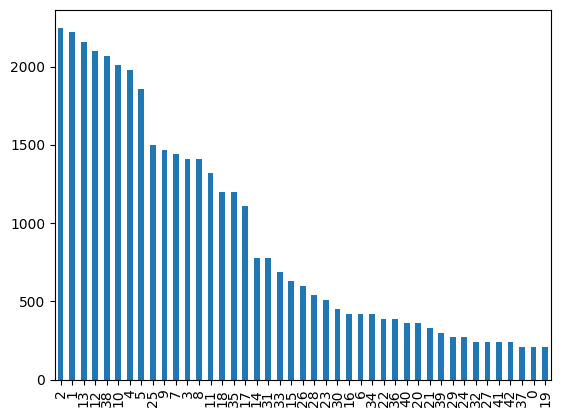

In [33]:
#check theh distributino of classes,check the imbalance
train_labels['ClassId'].value_counts().plot(kind='bar')


<Axes: >

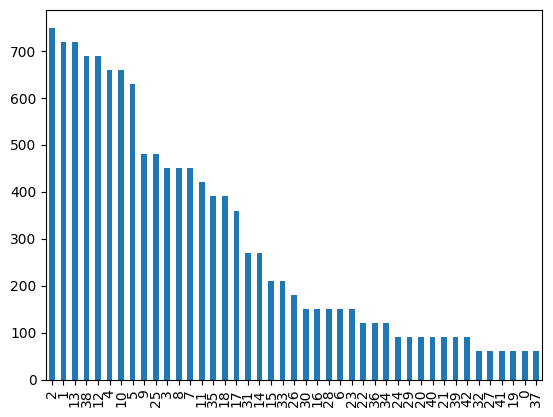

In [32]:
test_labels['ClassId'].value_counts().plot(kind='bar')

In [25]:
#check the size of images 
import glob

train_dir = '/content/train'

img_sizes = []
for filename in train_labels['Path']:
    img_path = os.path.join(train_dir, filename)
    img_files = glob.glob(img_path)
    for file in img_files:
        img = cv2.imread(file)
        if img is not None:
            img_sizes.append(img.shape[:2])
    
img_sizes = np.array(img_sizes)

if len(img_sizes) == 0:
    print('No images were loaded')
else:
    print('Minimum image size:', img_sizes.min(axis=0))
    print('Maximum image size:', img_sizes.max(axis=0))
    print('Average image size:', np.mean(img_sizes, axis=0))


Minimum image size: [25 25]
Maximum image size: [225 243]
Average image size: [50.32892958 50.83587952]


<Axes: >

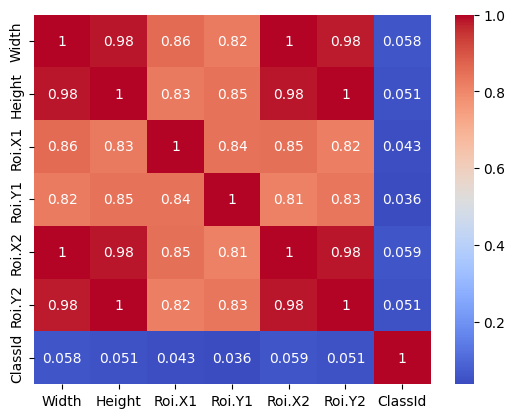

In [14]:
#build the correlation of  train data in image classfication
import seaborn as sns
import pandas as pd


corr_matrix = train_labels.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [30]:
#build the correlation of pixel value of train dataset 
import numpy as np

# assuming train_dir is a 4D numpy array of shape (num_samples, height, width, channels)
num_samples = train_labels.shape[0]
img_data_flat = img.reshape(num_samples, -1)  # reshape pixel values into a 2D array

corr_matrix = np.corrcoef(img_data_flat, rowvar=False)  # compute correlation matrix

sns.heatmap(corr_matrix, cmap='coolwarm')  # plot heatmap


ValueError: ignored

<Axes: >

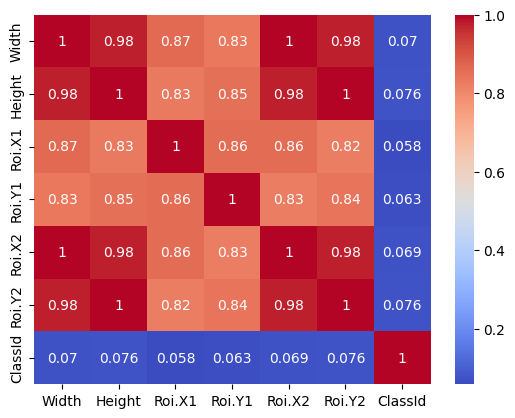

In [15]:
#build the correlation of  test data in image classfication

corr_matrix = test_labels.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')